In [1]:
# Installs
!pip install pycountry_convert 
!pip install folium
!pip install calmap
# !pip install pandas==0.25.1
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths_v5.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed_v4.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_usa_c_v3.h5

  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746867 sha256=c93efb37ff22e484befac404f2e70073b4bba45e38264aaef4d8cbff446f643a
  Stored in directory: c:\users\mulla\appdata\local\pip\cache\wheels\57\e8\3f\120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
 pip install plotly 

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=9eb56256d69cb0ec96ce1c67d6f502749f5efb56b055fb2e35f6974a568153e7
  Stored in directory: c:\users\mulla\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import ticker 
# import pycountry_convert as pc
# import folium
# import branca
# from datetime import datetime, timedelta,date
# from scipy.interpolate import make_interp_spline, BSpline
# import plotly.express as px
# import json, requests
# import calmap

# from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
# from keras import models
# from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline


In [2]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [3]:
print(df_confirmed.info())
print(df_confirmed.head())
print(df_confirmed.describe())
print(df_confirmed.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 190 entries, Province/State to 7/25/20
dtypes: float64(2), int64(186), object(2)
memory usage: 395.0+ KB
None
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/16/20  7/17/20  7/18/20  \
0        0        0        0        0  ...    35070    35229    35301   
1        0        0        0        0  ...     3851     3906     4008   
2        0        0        0        0  ...    21355    21948    22549   
3        0        0        0        0  ...      877      880      880   

In [4]:
# new dataset 
df_confirmed = df_confirmed.drop(['Province/State'],axis =1)

In [5]:
print(df_confirmed.info())
print(df_confirmed.head())
print(df_confirmed.describe())
print(df_confirmed.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 189 entries, Country/Region to 7/25/20
dtypes: float64(2), int64(186), object(1)
memory usage: 392.9+ KB
None
  Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.93911  67.709953        0        0        0        0   
1        Albania  41.15330  20.168300        0        0        0        0   
2        Algeria  28.03390   1.659600        0        0        0        0   
3        Andorra  42.50630   1.521800        0        0        0        0   
4         Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  7/16/20  7/17/20  7/18/20  7/19/20  \
0        0        0        0  ...    35070    35229    35301    35475   
1        0        0        0  ...     3851     3906     4008     4090   
2        0        0        0  ...    21355    21948    22549    23084   
3        0        0        0  ...      877      880   

In [6]:
print(df_deaths.info())
print(df_deaths.describe())
print(df_deaths.head())
print(df_deaths.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 190 entries, Province/State to 7/25/20
dtypes: float64(2), int64(186), object(2)
memory usage: 395.0+ KB
None
              Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    0.063910    0.067669    0.097744    0.157895   
std     24.904600   70.191330    1.042337    1.043908    1.473615    2.453621   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...        7/16/20  \
co

In [7]:
# new dataset 
df_deaths = df_deaths.drop(['Province/State'],axis =1)

In [8]:
print(df_deaths.info())
print(df_deaths.describe())
print(df_deaths.head())
print(df_deaths.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 189 entries, Country/Region to 7/25/20
dtypes: float64(2), int64(186), object(1)
memory usage: 392.9+ KB
None
              Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    0.063910    0.067669    0.097744    0.157895   
std     24.904600   70.191330    1.042337    1.043908    1.473615    2.453621   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...        7/16/20  \
co

In [9]:
print(df_covid19.info())
print(df_covid19.describe())
print(df_covid19.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       188 non-null    object 
 1   Last_Update          188 non-null    object 
 2   Lat                  186 non-null    float64
 3   Long_                186 non-null    float64
 4   Confirmed            188 non-null    float64
 5   Deaths               188 non-null    float64
 6   Recovered            185 non-null    float64
 7   Active               188 non-null    float64
 8   Incident_Rate        186 non-null    float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Mortality_Rate       188 non-null    float64
 12  UID                  188 non-null    int64  
 13  ISO3                 186 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 20.7+ KB
None
              Lat       Lo

In [10]:
df_covid19.isnull().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                3
Active                   0
Incident_Rate            2
People_Tested          188
People_Hospitalized    188
Mortality_Rate           0
UID                      0
ISO3                     2
dtype: int64

In [11]:
df_covid19[df_covid19['Lat'].isnull()]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
68,Diamond Princess,2020-07-26 19:34:57,NaN,NaN,712.0,13.0,651.0,48.0,NaN,NaN,NaN,1.825843,9999,NaN
116,MS Zaandam,2020-07-26 19:34:57,NaN,NaN,9.0,2.0,NaN,7.0,NaN,NaN,NaN,22.222222,8888,NaN


In [14]:
df_covid19['Lat'].fillna(0,inplace=True)

In [15]:
df_covid19[df_covid19['Lat'].isnull()]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3


In [16]:
df_covid19[df_covid19['Long_'].isnull()]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
68,Diamond Princess,2020-07-26 19:34:57,0.0,NaN,712.0,13.0,651.0,48.0,NaN,NaN,NaN,1.825843,9999,NaN
116,MS Zaandam,2020-07-26 19:34:57,0.0,NaN,9.0,2.0,NaN,7.0,NaN,NaN,NaN,22.222222,8888,NaN


In [17]:
df_covid19['Long_'].fillna(0,inplace=True)

In [18]:
df_covid19[df_covid19['Long_'].isnull()]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3


In [19]:
df_covid19[df_covid19['Recovered'].isnull()]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
14,Sweden,2020-07-26 19:34:57,60.1282,18.6435,78997.0,5697.0,NaN,73300.0,782.205050,NaN,NaN,7.211666,752,SWE
116,MS Zaandam,2020-07-26 19:34:57,0.0000,0.0000,9.0,2.0,NaN,7.0,NaN,NaN,NaN,22.222222,8888,NaN
155,Serbia,2020-07-26 19:34:57,44.0165,21.0059,23730.0,534.0,NaN,23196.0,271.592024,NaN,NaN,2.250316,688,SRB


In [20]:

if (df_covid19["Active"].equals(df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"])):
   df_covid19['Recovered'].fillna(0)
else:
   df_covid19['Recovered']= df_covid19["Confirmed"]-df_covid19["Active"]-df_covid19["Deaths"]

print(df_covid19[df_covid19['Recovered'].isnull()])
    

Empty DataFrame
Columns: [Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, Incident_Rate, People_Tested, People_Hospitalized, Mortality_Rate, UID, ISO3]
Index: []


In [21]:
df_covid19[df_covid19['Recovered']==0]


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
14,Sweden,2020-07-26 19:34:57,60.1282,18.6435,78997.0,5697.0,0.0,73300.0,782.205050,NaN,NaN,7.211666,752,SWE
116,MS Zaandam,2020-07-26 19:34:57,0.0000,0.0000,9.0,2.0,0.0,7.0,NaN,NaN,NaN,22.222222,8888,NaN
155,Serbia,2020-07-26 19:34:57,44.0165,21.0059,23730.0,534.0,0.0,23196.0,271.592024,NaN,NaN,2.250316,688,SRB


In [22]:
df_covid19['Incident_Rate'].fillna(0,inplace=True)

In [23]:
# new dataset 
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)


In [24]:
print(df_covid19.info())
print(df_covid19.describe())
print(df_covid19.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  188 non-null    object 
 1   Last_Update     188 non-null    object 
 2   Lat             188 non-null    float64
 3   Long_           188 non-null    float64
 4   Confirmed       188 non-null    float64
 5   Deaths          188 non-null    float64
 6   Recovered       188 non-null    float64
 7   Active          188 non-null    float64
 8   Incident_Rate   188 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.3+ KB
None
              Lat       Long_     Confirmed         Deaths     Recovered  \
count  188.000000  188.000000  1.880000e+02     188.000000  1.880000e+02   
mean    19.981124   17.376428  8.581835e+04    3440.622340  4.932228e+04   
std     23.736488   57.100921  3.743748e+05   13931.639646  1.819543e+05   
min    -40.900600 -102.552800  9.000000

In [25]:
df_covid19.isnull().sum()

Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
dtype: int64

In [29]:
# Preprocessing
df_confirmed = df_confirmed.rename(columns={"Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
# df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]
# df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

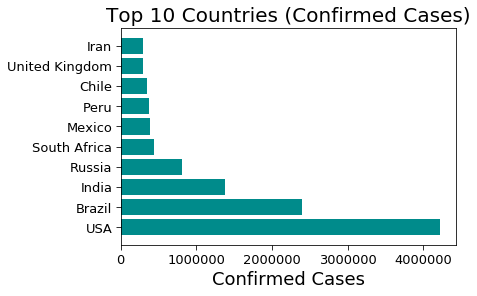

In [78]:
# plotting top 10 countries confirmed cases
confirmed_cases= df_countries_cases.nlargest(10,'Confirmed')

plt.barh(confirmed_cases['country'],confirmed_cases['Confirmed'],color="darkcyan")
plt.xlabel("Confirmed Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)

plt.show()

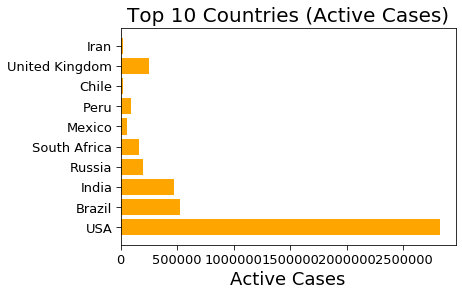

In [79]:
# plotting top 10 countries active cases
active_cases= df_countries_cases.nlargest(10,'Active')

plt.barh(confirmed_cases['country'],confirmed_cases['Active'],color="Orange")
plt.xlabel("Active Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)

plt.show()

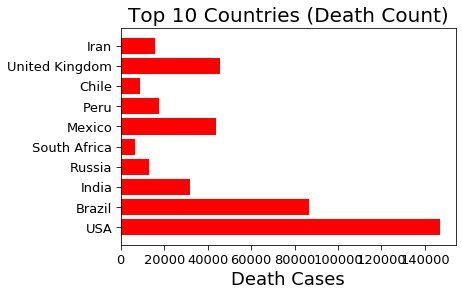

In [82]:
# plotting top 10 countries Death Count
death_cases= df_countries_cases.nlargest(10,'Deaths')

plt.barh(confirmed_cases['country'],confirmed_cases['Deaths'],color="Red")
plt.xlabel("Death Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Countries (Death Count)",fontsize=20)

plt.show()